### ***Image Classification using Logistic Regression in PyTorch***

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='C:/Users/sdkr/Desktop/Deep Learning', download=True)

In [10]:
len(dataset)

60000

In [11]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:/Users/sdkr/Desktop/Deep Learning
    Split: Train

In [12]:
test_dataset = MNIST(root='C:/Users/sdkr/Desktop/Deep Learning', train=False)

In [13]:
len(test_dataset)

10000

In [14]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:/Users/sdkr/Desktop/Deep Learning
    Split: Test

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [16]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x1B7F8462E50>, 5)

label :  5


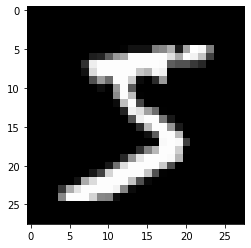

In [17]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('label : ', label)

label :  8


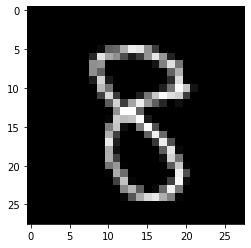

In [18]:
image, label = dataset[3600]
plt.imshow(image, cmap='gray')
print('label : ', label)

In [19]:
import torchvision.transforms as transforms

In [20]:
dataset = MNIST(
    root='C:/Users/sdkr/Desktop/Deep Learning',
    transform=transforms.ToTensor()
)

In [21]:
img_tensor, label = dataset[0]

In [22]:
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [23]:
print(img_tensor[:, 10:15, 10:15])
torch.min(img_tensor), torch.max(img_tensor)

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


(tensor(0.), tensor(1.))

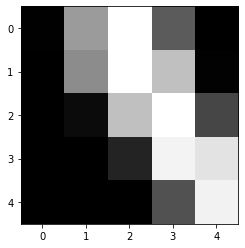

In [24]:
plt.imshow(img_tensor[0, 10:15, 10:15], cmap='gray')

In [25]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [26]:
from torch.utils.data import DataLoader

batch_size = 64

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [29]:
!pip install jovian --upgrade --quiet

In [30]:
import torch.nn as nn

In [32]:
input_size = 28*28
num_classes = 10
model = nn.Linear(in_features=input_size, out_features=num_classes)

In [33]:
model.weight, model.weight.shape

(Parameter containing:
 tensor([[-0.0231, -0.0036,  0.0328,  ...,  0.0171, -0.0063, -0.0092],
         [-0.0008,  0.0161,  0.0120,  ...,  0.0348,  0.0050, -0.0081],
         [ 0.0321,  0.0205, -0.0173,  ..., -0.0241, -0.0024,  0.0158],
         ...,
         [-0.0254, -0.0295,  0.0043,  ..., -0.0148, -0.0171, -0.0143],
         [-0.0310,  0.0021,  0.0205,  ...,  0.0173, -0.0308, -0.0236],
         [ 0.0011,  0.0040,  0.0308,  ..., -0.0323,  0.0340, -0.0084]],
        requires_grad=True),
 torch.Size([10, 784]))

In [34]:
model.bias, model.bias.shape

(Parameter containing:
 tensor([ 0.0325, -0.0041,  0.0106,  0.0261,  0.0013, -0.0106,  0.0313, -0.0208,
         -0.0271, -0.0151], requires_grad=True),
 torch.Size([10]))

In [38]:
for images, labels in train_loader :
    print(labels)
    print(images.shape)
    output = model(images)

tensor([0, 3, 2, 4, 9, 5, 3, 6, 1, 2, 9, 4, 6, 1, 6, 7, 9, 2, 5, 7, 7, 6, 0, 6,
        9, 9, 9, 8, 7, 7, 3, 1, 5, 5, 9, 4, 7, 2, 0, 4, 7, 3, 1, 5, 8, 2, 4, 9,
        3, 1, 1, 2, 4, 9, 4, 9, 1, 0, 0, 8, 3, 8, 4, 6])
torch.Size([64, 1, 28, 28])


RuntimeError: size mismatch, m1: [1792 x 28], m2: [784 x 10] at ..\aten\src\TH/generic/THTensorMath.cpp:41

In [39]:
class Mnistmodel(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb) :
        xb = xb.reshape(-1, 28*28)
        out = self.linear(xb)
        return out

model = Mnistmodel()    

In [40]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0340,  0.0142, -0.0268,  ..., -0.0299,  0.0134,  0.0117],
         [-0.0181,  0.0013,  0.0324,  ...,  0.0251, -0.0290, -0.0008],
         [ 0.0166,  0.0122,  0.0212,  ..., -0.0216,  0.0196, -0.0090],
         ...,
         [ 0.0123,  0.0086,  0.0112,  ...,  0.0012, -0.0187,  0.0301],
         [ 0.0276, -0.0041,  0.0223,  ...,  0.0046,  0.0300,  0.0224],
         [-0.0283,  0.0045,  0.0154,  ...,  0.0064,  0.0192,  0.0125]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0019, -0.0027,  0.0048, -0.0076, -0.0084,  0.0221, -0.0280, -0.0331,
          0.0014,  0.0047], requires_grad=True)]

In [59]:
for images, labels in train_loader:
    outputs = model(images)
    break
print('outputs.shape : ', outputs.shape)
print('Sample ouputs : \n', outputs[:2].data)

outputs.shape :  torch.Size([64, 10])
Sample ouputs : 
 tensor([[-0.1391, -0.0794, -0.0734, -0.2143,  0.1064, -0.0166,  0.0444, -0.3387,
          0.1794,  0.2388],
        [-0.1491, -0.0318, -0.0027, -0.3521,  0.0700, -0.1388, -0.0824, -0.6141,
          0.0644, -0.1050]])


In [60]:
import torch.nn.functional as F

In [61]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probilities
print("Sample probabilites: \n", probs[:2].data)

# Add up the probabilities of an output row
print('Sum : ', torch.sum(probs[0]).item())

Sample probabilites: 
 tensor([[0.0883, 0.0938, 0.0943, 0.0819, 0.1129, 0.0998, 0.1061, 0.0724, 0.1215,
         0.1289],
        [0.0968, 0.1088, 0.1120, 0.0790, 0.1205, 0.0978, 0.1034, 0.0608, 0.1198,
         0.1011]])
Sum :  1.0


In [62]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 4, 2, 2, 9, 2, 9, 9, 9, 4, 2, 6, 9, 9, 5, 4, 2, 6, 1, 3, 1, 9, 4, 6,
        6, 2, 4, 4, 3, 2, 8, 9, 4, 2, 0, 4, 4, 4, 9, 2, 5, 1, 4, 2, 4, 4, 9, 4,
        9, 4, 3, 9, 9, 4, 4, 3, 8, 9, 9, 2, 4, 1, 1, 9])
tensor([0.1289, 0.1205, 0.1299, 0.1345, 0.1437, 0.1378, 0.1239, 0.1359, 0.1277,
        0.1213, 0.1470, 0.1235, 0.1300, 0.1314, 0.1228, 0.1270, 0.1312, 0.1662,
        0.1240, 0.1424, 0.1407, 0.1488, 0.1260, 0.1443, 0.1483, 0.1589, 0.1294,
        0.1267, 0.1178, 0.1253, 0.1122, 0.1347, 0.1365, 0.1436, 0.1152, 0.1525,
        0.1263, 0.1152, 0.1319, 0.1154, 0.1164, 0.1219, 0.1224, 0.1220, 0.1486,
        0.1217, 0.1460, 0.1341, 0.1458, 0.1598, 0.1224, 0.1560, 0.1308, 0.1304,
        0.1386, 0.1178, 0.1171, 0.1197, 0.1229, 0.1184, 0.1260, 0.1414, 0.1173,
        0.1586], grad_fn=<MaxBackward0>)


In [64]:
labels

tensor([8, 9, 0, 8, 8, 3, 7, 6, 0, 8, 3, 0, 6, 2, 6, 9, 3, 0, 4, 0, 3, 6, 2, 2,
        6, 3, 6, 2, 7, 9, 1, 0, 4, 3, 7, 2, 7, 7, 3, 0, 5, 7, 9, 5, 5, 3, 3, 9,
        0, 3, 1, 3, 8, 2, 8, 1, 1, 9, 1, 0, 6, 3, 1, 3])

In [67]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [68]:
accuracy(outputs, labels)

tensor(0.0781)

In [69]:
loss_fn = F.cross_entropy

In [70]:
loss = loss_fn(outputs, labels)
loss

tensor(2.3822, grad_fn=<NllLossBackward>)

In [71]:
torch.exp(-loss)

tensor(0.0923, grad_fn=<ExpBackward>)

In [73]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 28 * 28)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return {'val_loss' : loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_loss = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch[{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
model = MnistModel()

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in train_loader:
        